### For visualizing the DataFrames, we display the data from different devices side by side. This approach provides a better overall insight into the entire dataset.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
thresholds ={"dev-5t2uup6709t3":0,
"dev-5t2utpi5paxv":500,
"dev-5t2uyos6ulyr":0,
"dev-5t2uv5yxfbft":1500,
"dev-5t2ure2gsucf":0,
"dev-5t2uy4thkcdt":0,
"dev-5t2uvus0me23":2000,
"dev-5t2v0iy5iw8p":4000,
"dev-5t2uxn4wxw33":3500,
"dev-5t2v2bfwnagv":5000,
"dev-5t2ux5l4mfn1":1000,
"dev-5t2ut9n2f0yp":0, 
"dev-5t2upjdaeobf":0,  
"dev-5t2v17d5skor":0,
"dev-5t2uza97fe7p":1500,
"dev-5t2uqb77ohb1":1500,
"dev-5t2uu82uirad":4000,
"dev-5t2uzv34fzcn":1700,
"dev-5t2v1puiqwfx":0}

In [3]:
def parse_values(row):
    values = [float(x.strip(' []')) for x in row.split(',')]
    return pd.Series(values, index=['p_avg', 'p_min', 'p_max'])

In [4]:
# Read the data
def load_and_process_data(file_path):
    df = pd.read_csv(file_path, parse_dates=True, low_memory=False)
    df['timestamp_device'] = pd.to_datetime(df['timestamp_device'])
    df = df[df['tag'] == 'data'].reset_index(drop=True)
    df = df[['P', 'timestamp_device', 'device_id']]
    df[['p_avg', 'p_min', 'p_max']] = df['P'].apply(parse_values)
    df = df.drop(columns=['P'])
    return df

In [5]:
df = load_and_process_data(file_path="data/data.csv")

In [6]:
dfs={}
grouped_data = df.groupby('device_id')
for i, (device_id, data) in enumerate(grouped_data, start=1):
    dfs[i] = data.sort_values(by ='timestamp_device').reset_index(drop= True)
    threshold = thresholds[dfs[i]['device_id'].iloc[0]]
    dfs[i].loc[dfs[i]['p_avg']< threshold, 'y'] = 0
    dfs[i].loc[dfs[i]['p_avg'] > threshold, 'y'] = 1

####  Devices with no determined threshold are shown in orange : df1, df3, df4, df7, df12, df13, df17, and df18.
#### The rest of the devices with a determined threshold are plotted in green : df2, df5, df6, df8, df9, df10, df11, df14, df15, df16, and df19.

In [7]:
def plot_box_plots_side_by_side(dfs, col_names):
    plt.figure(figsize=(20, 5))
    
    # Collect data for the box plots and labels
    data_to_plot = []
    labels = []
    for device_id, df in dfs.items():
        data_to_plot.append(df[col_names].values)
        labels.append(device_id)

    # Define color groups
    color_map = {
        'group1': '#FF6347',  # Tomato
        'group2': '#90EE90'   # LightGreen
    }

    # Assign colors to each group
    color_assignments = []
    for device_id in labels:
        if device_id in [1, 3, 4, 7, 12, 13, 17, 18]:
            color_assignments.append(color_map['group1'])
        else:
            color_assignments.append(color_map['group2'])

    # Create boxplot
    bplot = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)
    
    # Set the colors for each box and median line
    for patch, median, color in zip(bplot['boxes'], bplot['medians'], color_assignments):
        patch.set_facecolor(color)
        median.set_color(color)
        median.set_linewidth(2)
    
    plt.title('Box Plot of Powers by Device')
    plt.xlabel('Device ID')
    plt.ylabel('Values')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

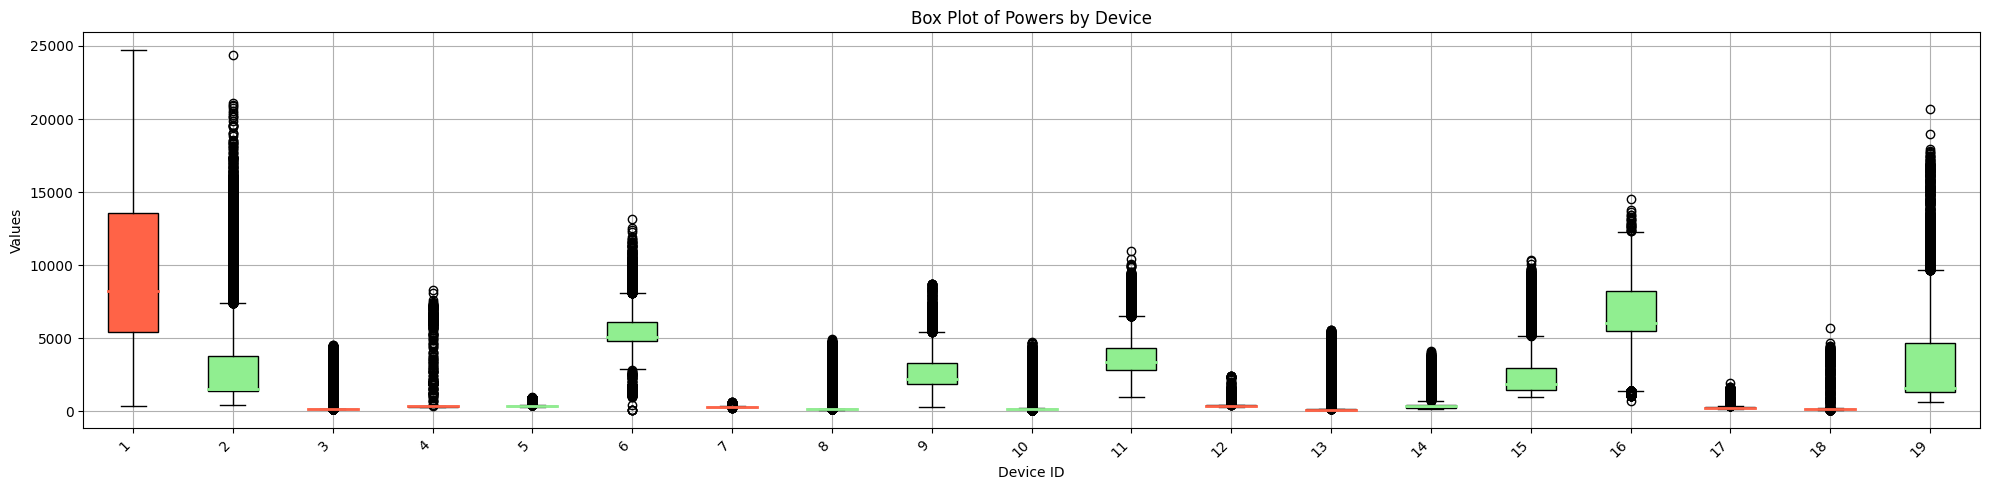

In [8]:
plot_box_plots_side_by_side(dfs, 'p_avg')

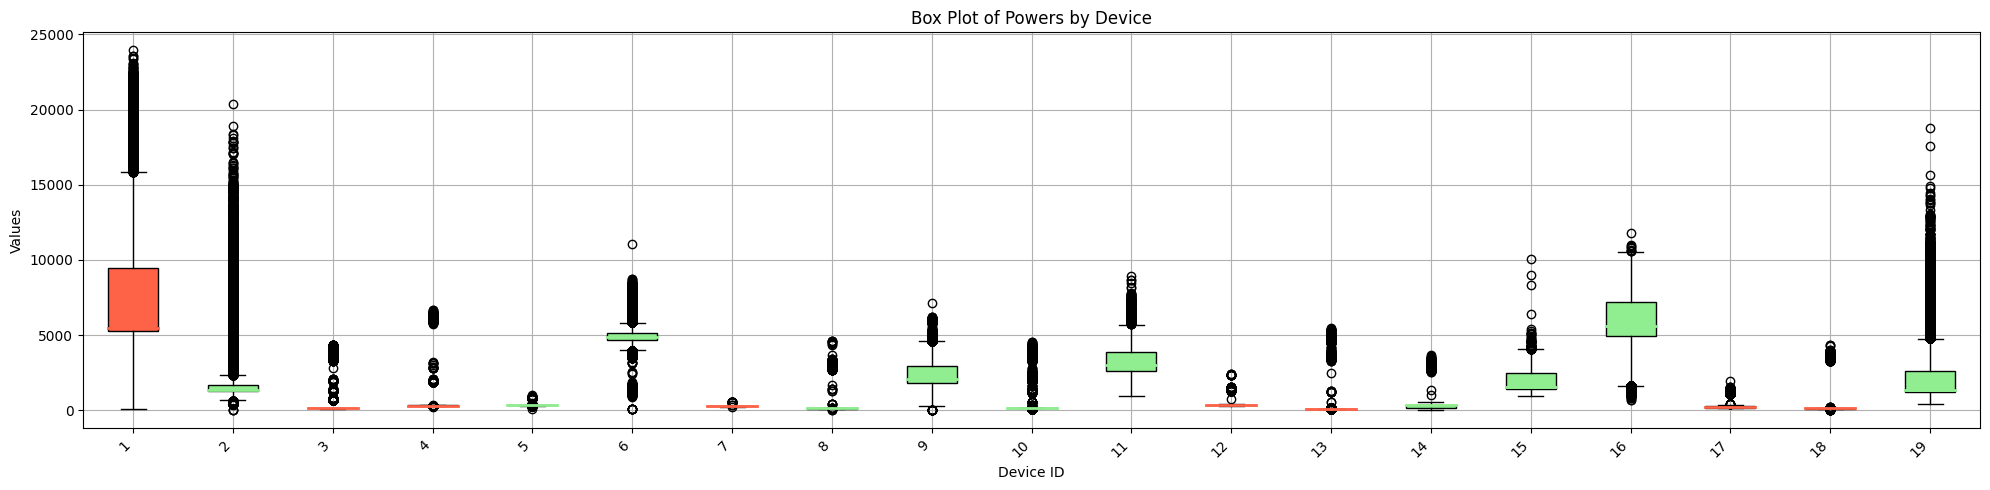

In [9]:
plot_box_plots_side_by_side(dfs, 'p_min')

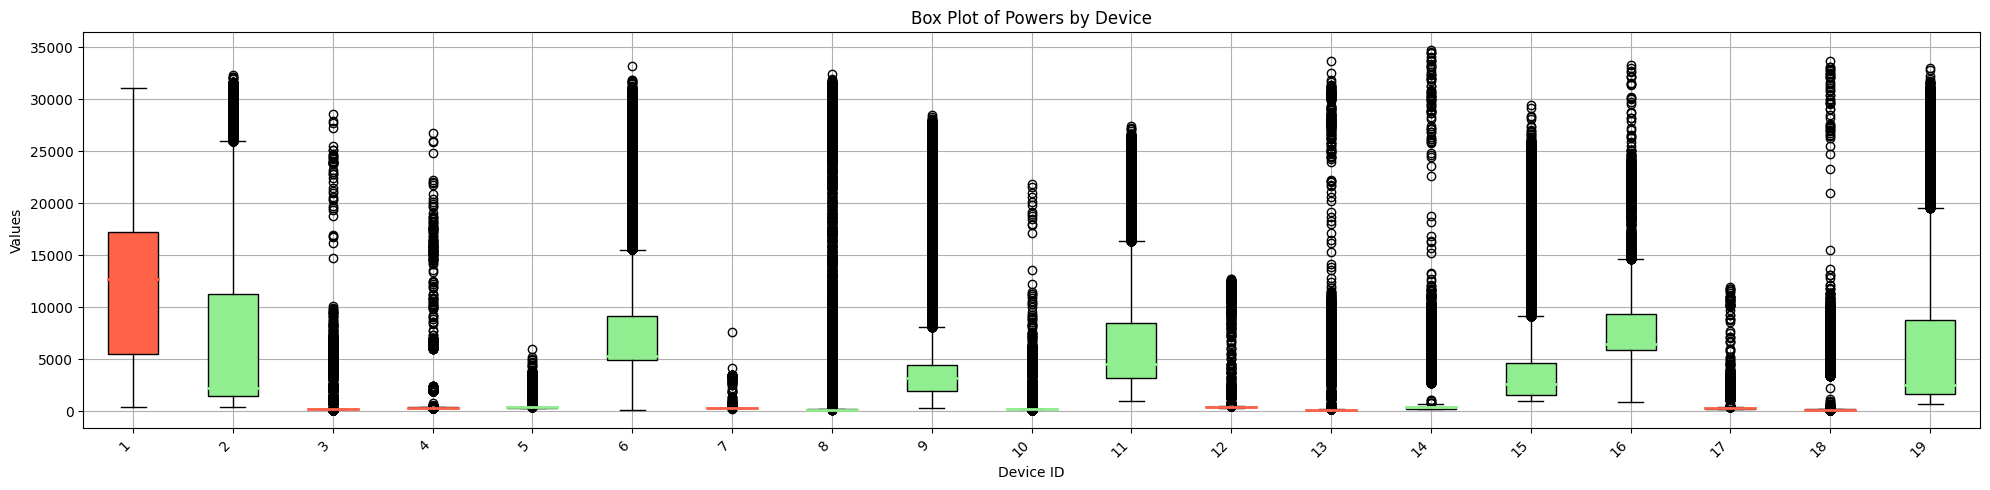

In [10]:
plot_box_plots_side_by_side(dfs, 'p_max')

#### This function creates a violin plot for p_avg across the 19 devices. It shows the distribution, probability density, and range of the data, providing a comprehensive view of the dataset’s distribution for each device.

In [11]:
def plot_violin():
    for key in dfs:
        plt.figure(figsize=(10, 6))  # Create a new figure for each plot
        sns.violinplot(y= dfs[key]['p_avg'],data=dfs[key], inner='quartile')
        plt.title(f'Violin plot for p_avg - Device {key}')
        plt.xlabel('p_avg')
        plt.ylabel('Density')
    #     plt.savefig(f'violin_plot_{key}.png')
        plt.show()

#### Used for visualizing univariate distributions of data

<Figure size 1000x600 with 0 Axes>

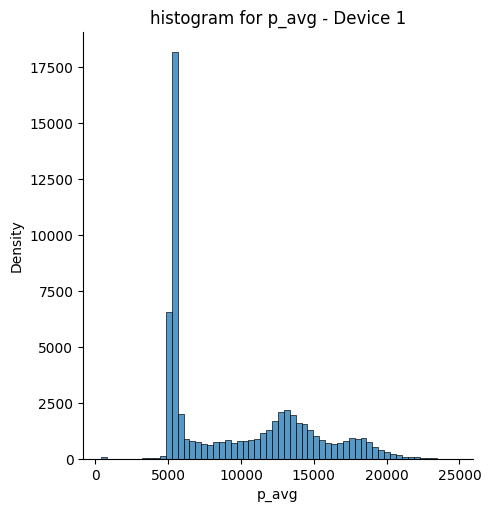

<Figure size 1000x600 with 0 Axes>

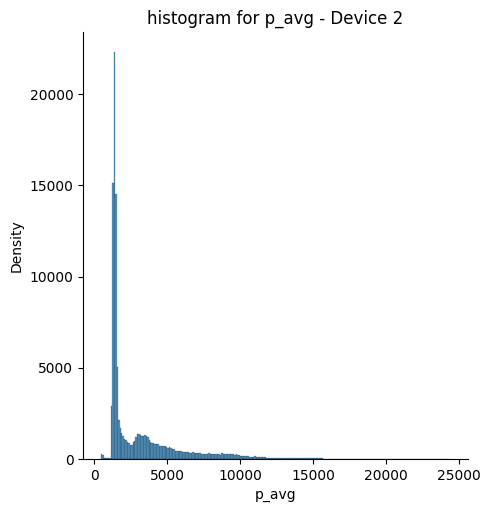

<Figure size 1000x600 with 0 Axes>

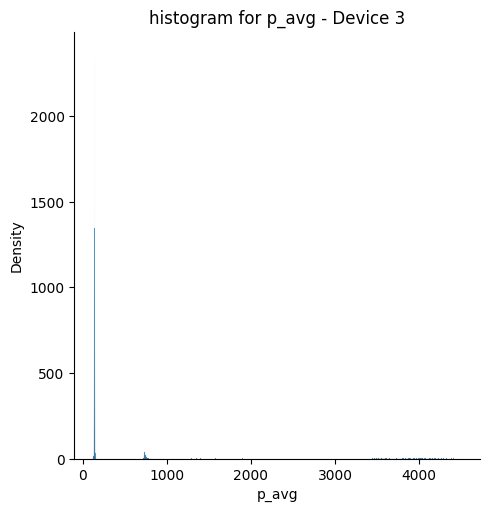

<Figure size 1000x600 with 0 Axes>

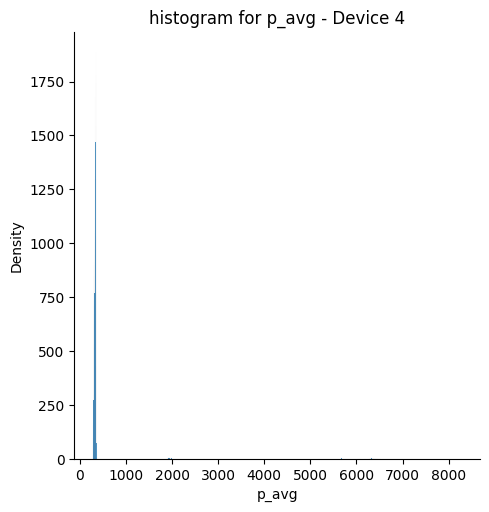

<Figure size 1000x600 with 0 Axes>

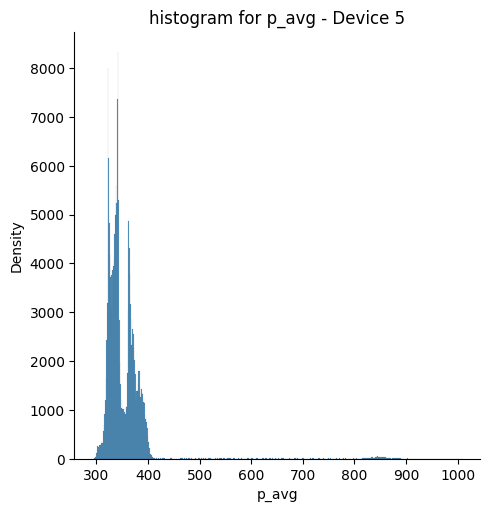

<Figure size 1000x600 with 0 Axes>

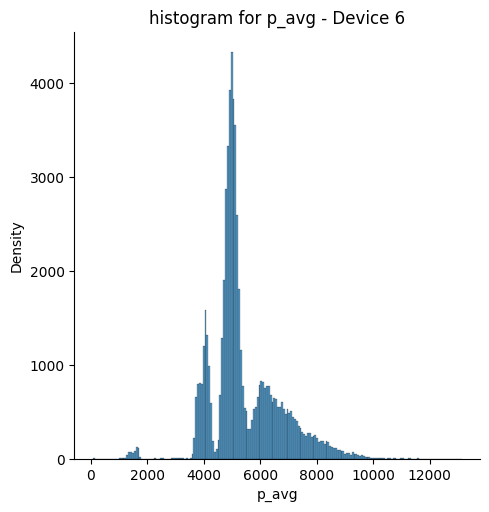

<Figure size 1000x600 with 0 Axes>

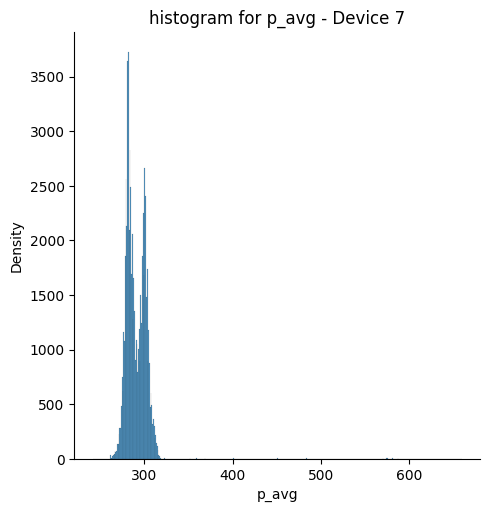

<Figure size 1000x600 with 0 Axes>

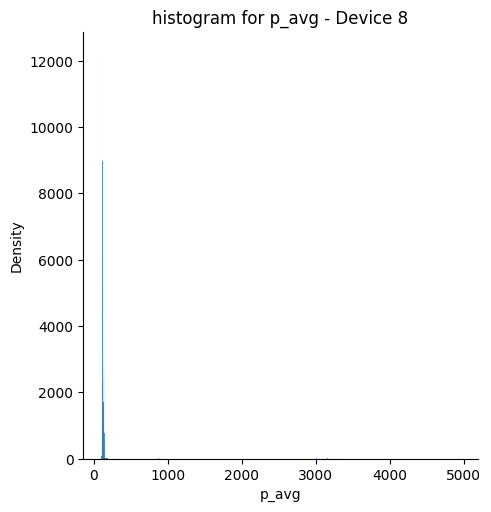

<Figure size 1000x600 with 0 Axes>

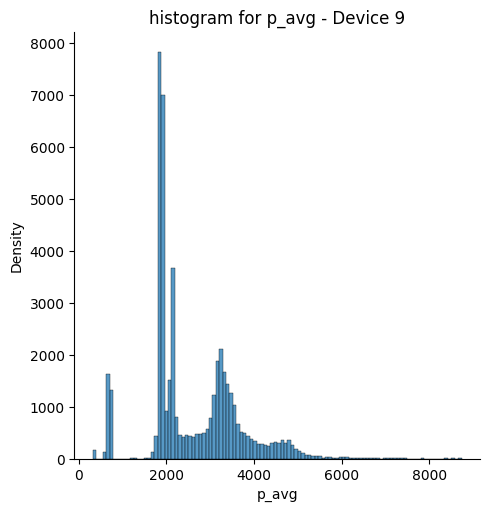

<Figure size 1000x600 with 0 Axes>

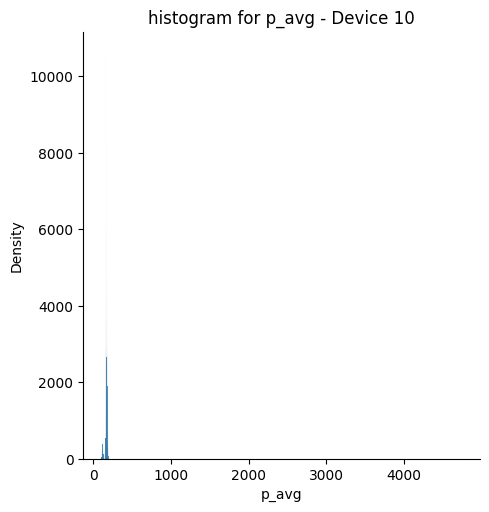

<Figure size 1000x600 with 0 Axes>

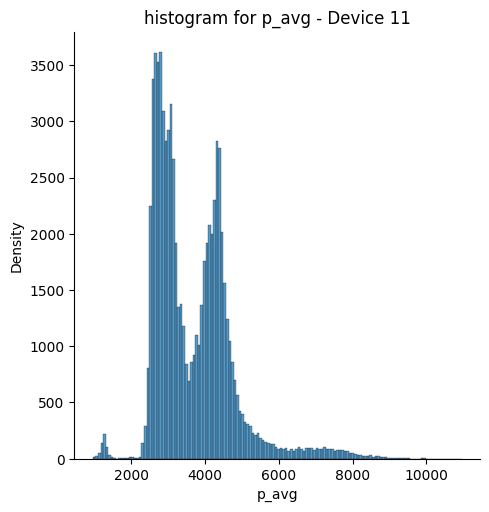

<Figure size 1000x600 with 0 Axes>

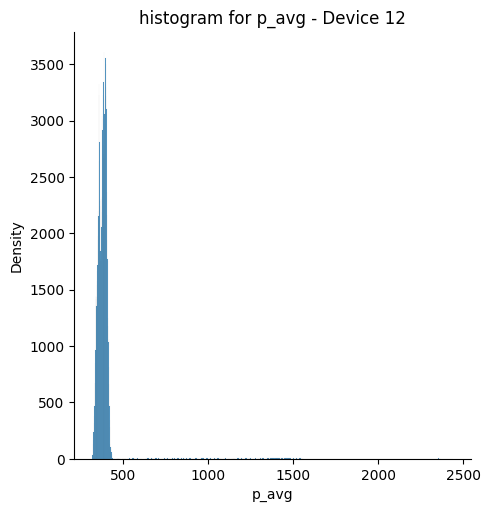

<Figure size 1000x600 with 0 Axes>

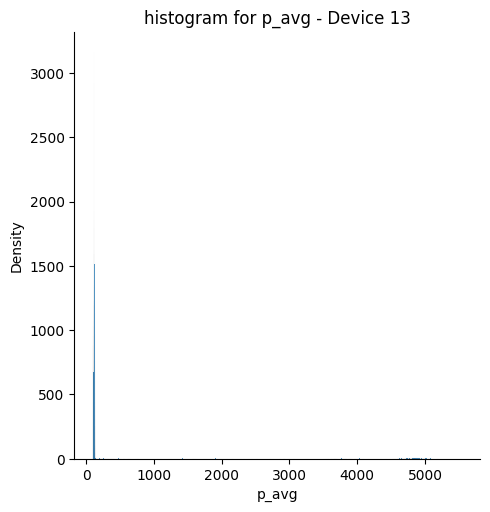

<Figure size 1000x600 with 0 Axes>

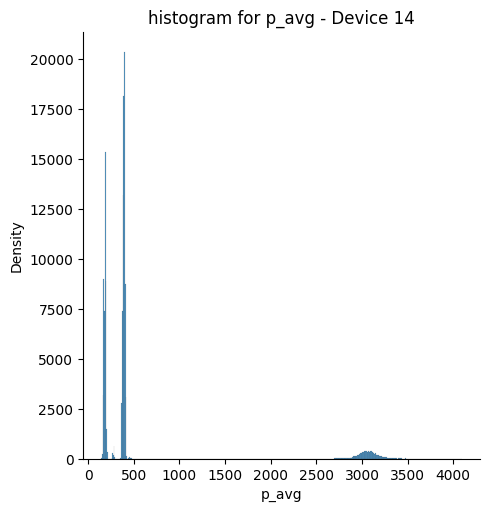

<Figure size 1000x600 with 0 Axes>

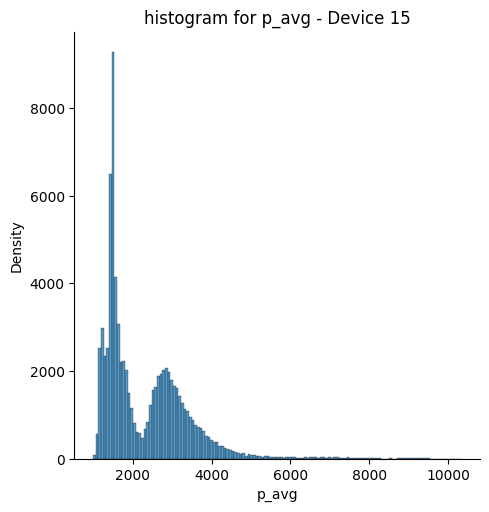

<Figure size 1000x600 with 0 Axes>

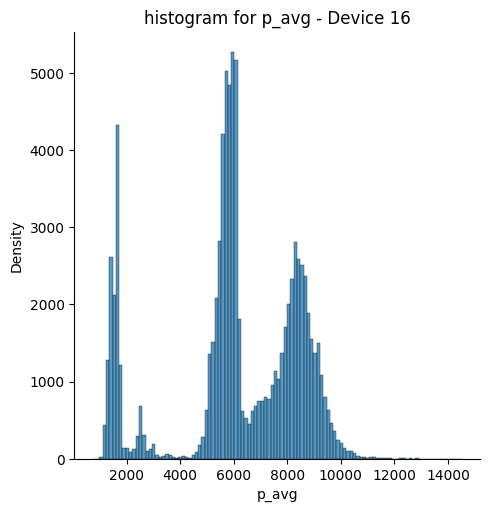

<Figure size 1000x600 with 0 Axes>

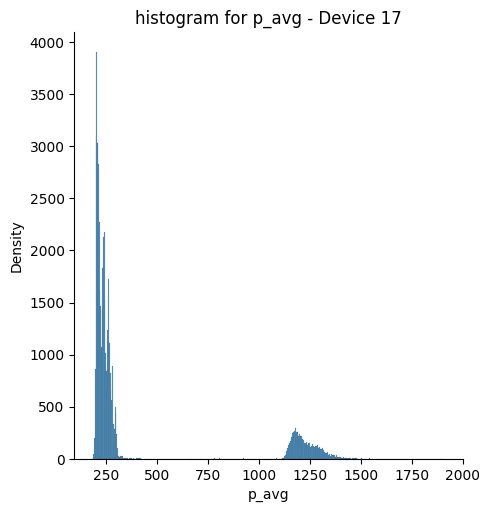

<Figure size 1000x600 with 0 Axes>

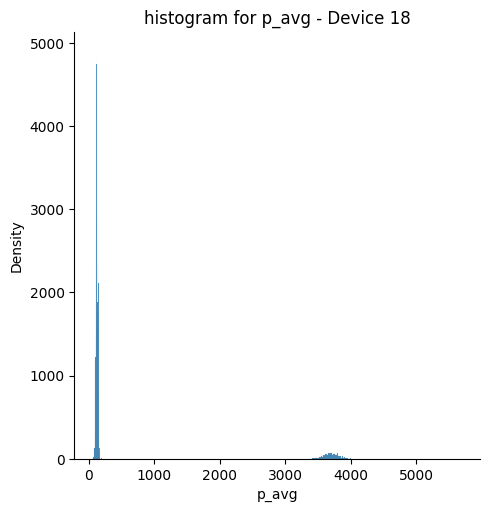

<Figure size 1000x600 with 0 Axes>

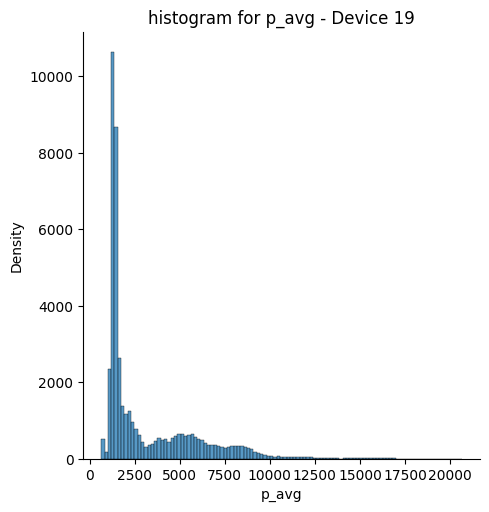

In [12]:
for key in dfs:
    plt.figure(figsize=(10, 6))  # Create a new figure for each plot
    sns.displot(dfs[key]['p_avg'])
    plt.title(f'histogram for p_avg - Device {key}')
    plt.xlabel('p_avg')
    plt.ylabel('Density')
#     plt.savefig(f'violin_plot_{key}.png')
    plt.show()

#### This function plot the distribution of p_avg , p_min, p_max when they are set to 0 and 1 based on the manual thresholds 

In [13]:
def plot_device_distributions_kde_grid_individual_yaxis_all_col(dfs, columns):
    dfs_with_threshold = {i: df for i, df in dfs.items() if not df[df['y'] == 0].empty}

    num_devices = len(dfs_with_threshold)
    num_cols = 3
    num_rows = (num_devices + num_cols - 1) // num_cols  # Calculate number of rows needed

    # Initialize the figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows), sharex=False, sharey=False)

    # Flatten the axes array if it's not already flat
    if num_devices > 1:
        axes = axes.flatten()
    else:
        axes = [axes]  # Handle case with only one device

    # Define colors for ON (blue shades) and OFF (red shades)
    on_color = sns.color_palette("Blues", n_colors=len(columns))
    off_color = sns.color_palette("Reds", n_colors=len(columns))

    # Iterate over each device and plot its distribution
    for i, (df_index, df) in enumerate(dfs_with_threshold.items()):
        device_id = df.iloc[0]['device_id']
        row = i // num_cols
        col = i % num_cols

        if not df[df['y'] == 1].empty:
            for col_idx, column_name in enumerate(columns):
                sns.kdeplot(data=df[df['y'] == 0][column_name], ax=axes[i], fill=True, linewidth=1.5,
                            color=off_color[col_idx], label=f'{column_name} OFF')
                sns.kdeplot(data=df[df['y'] == 1][column_name], ax=axes[i], fill=True, linewidth=1.5,
                            color=on_color[col_idx], label=f'{column_name} ON')

            # Set title for each subplot
            axes[i].set_title(f'{device_id}', fontsize=14)

            # Set labels for x-axis and y-axis for each subplot
            axes[i].set_xlabel('', fontsize=14)
            axes[i].set_ylabel('', fontsize=14)

            # Add grid
            axes[i].grid(True)
            axes[i].legend()

    # Turn off empty subplots if there are any
    for j in range(i + 1, num_rows * num_cols):
        if j < len(axes):
            axes[j].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
#     plt.savefig('kde_grid_individual_yaxis_devices.png', dpi=300)  # Save the plot as an image file
    plt.show()

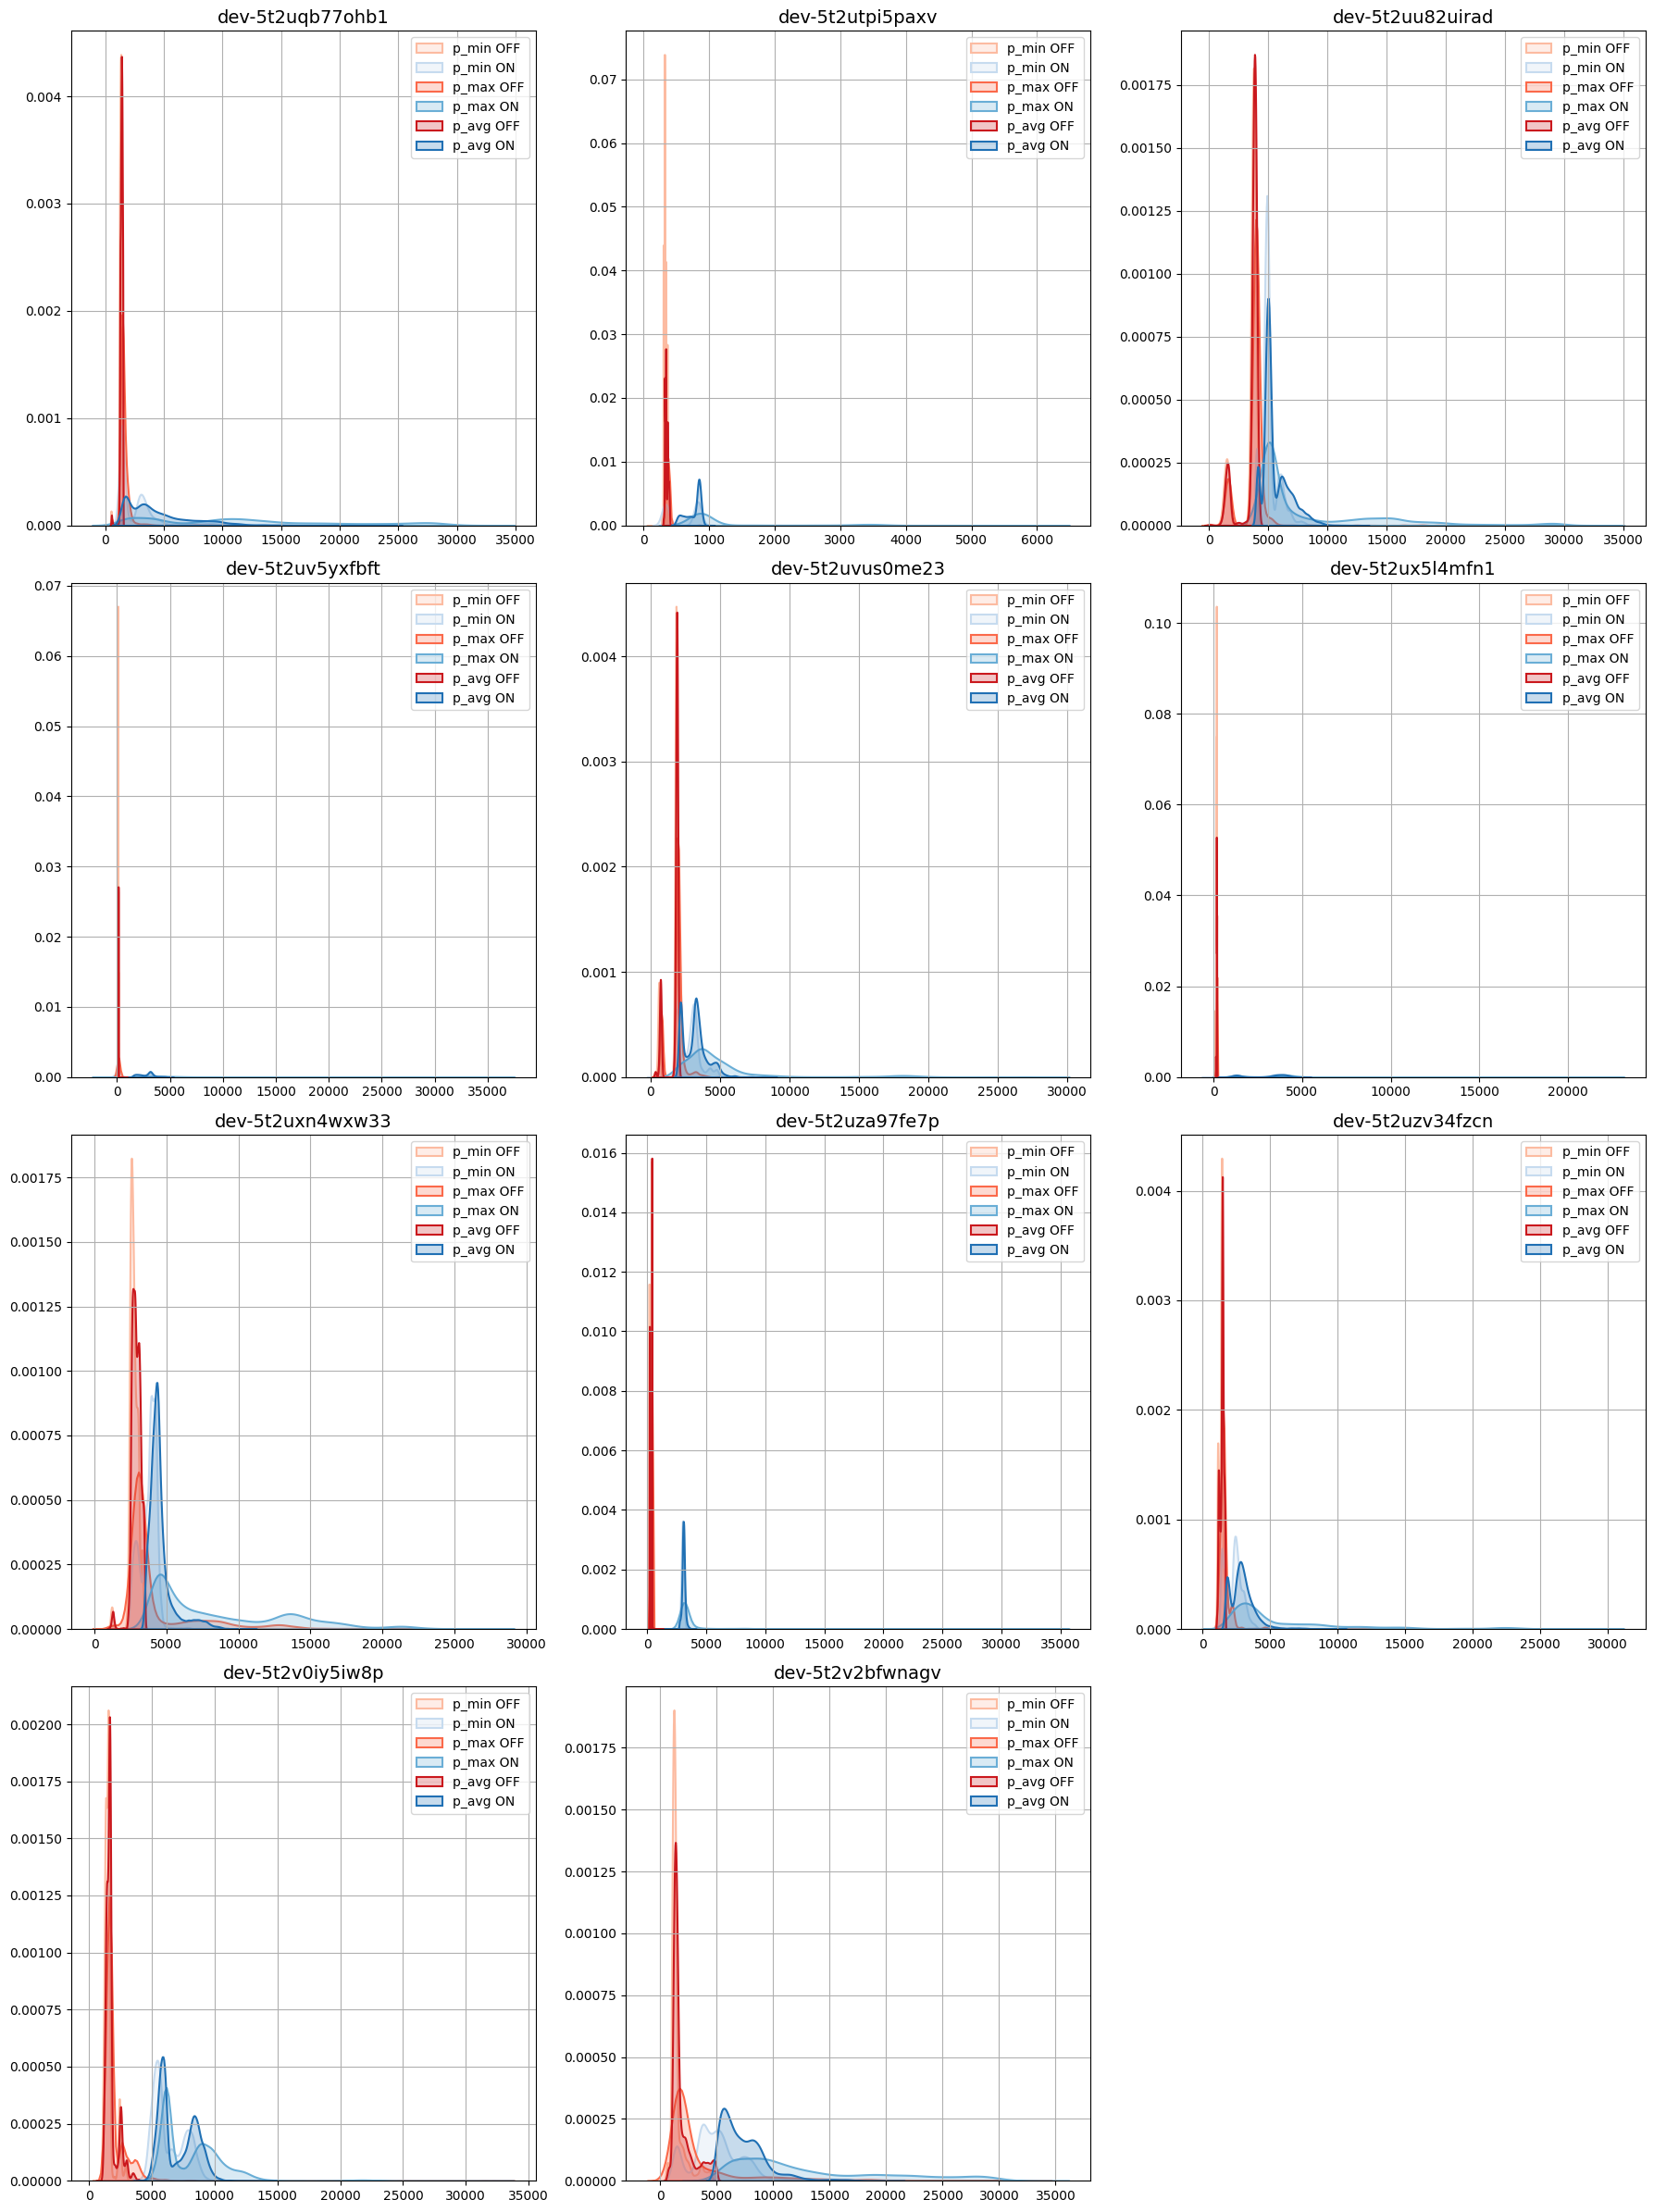

In [14]:
columns_to_plot = ['p_min', 'p_max', 'p_avg']
plot_device_distributions_kde_grid_individual_yaxis_all_col(dfs, columns_to_plot)

#### It is used to select a limited duration of time hourly and then plot it within that duration.

In [15]:
def select_date_range(df,n=1):
    start_date = df['timestamp_device'].min()
    end_date = start_date + pd.Timedelta(hours=n)
    return df[(df['timestamp_device'] >= start_date) & (df['timestamp_device'] <= end_date)]

In [16]:
def plot_timeseries(df,col,ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(df['timestamp_device'], df[col], linestyle='-')
    ax.set_title(f'{col} Over Time for Device ID {df["device_id"].iloc[0]}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel(col)
    ax.grid(True)